## Principal Component Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# read the data
df_phones = pd.read_csv('data_phones_2.csv')
df_phones.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,low
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,high
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,high
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,low


In [3]:
ind_vars = df_phones.drop('price_range', axis=1)

In [4]:
features = ind_vars.columns

In [5]:
x = ind_vars.values

In [6]:
x = StandardScaler().fit_transform(x)

In [7]:
x.shape

(2000, 20)

In [8]:
np.mean(x)

1.84297022087776e-17

In [9]:
np.std(x)

1.0

In [10]:
# convert to data frame
df_phones_standardised = pd.DataFrame(x,columns=features)
df_phones_standardised.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [11]:
# perform PCA
pca_phones = PCA(n_components=2)
principalComponents_phones = pca_phones.fit_transform(x)

In [12]:
# data frame with the principal components for all observations
df_phones_pca = pd.DataFrame(data = principalComponents_phones, columns = ['principal component 1', 'principal component 2'])

In [13]:
df_phones_pca.head()

,principal component 1,principal component 2
0,0.343540,-2.680246
1,-2.048306,0.668074
2,-1.380139,0.265666
3,-0.997779,-0.348173
4,1.555338,1.305746


In [14]:
pca_phones.explained_variance_ratio_

array([0.08370184, 0.08108526])

<Figure size 432x288 with 0 Axes>

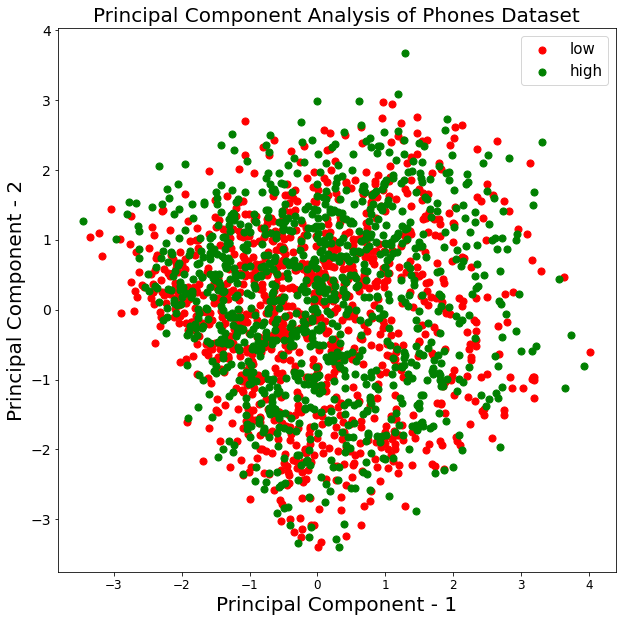

In [15]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Phones Dataset",fontsize=20)
targets = ['low', 'high']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_phones['price_range'] == target
    plt.scatter(df_phones_pca.loc[indicesToKeep, 'principal component 1'],
               df_phones_pca.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})